# KNN implementation in Julia
1st we call the packages that we will use

In [39]:
using NearestNeighbors, Plots
using PyCall, Random
using DataFrames

Now we set 100 random points and the seed to could reproduce the results

In [13]:
Random.seed!(1)

f1_train = rand(100);
f2_train = rand(100);

Let's plot points to see the scatter

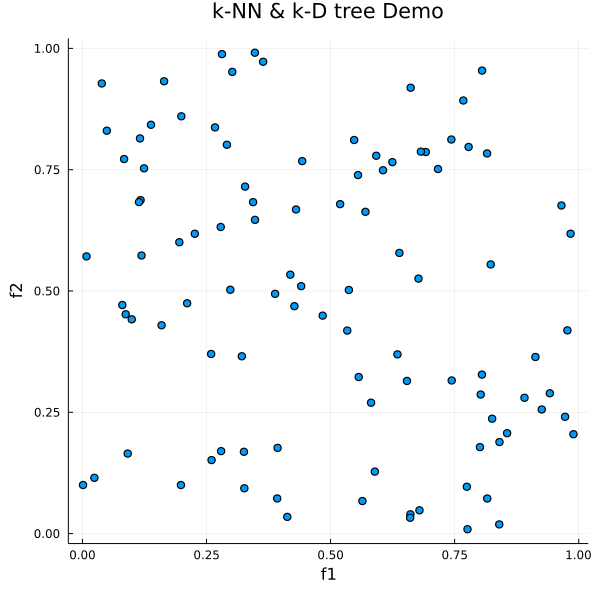

In [76]:
gr(size = (600,600))
p_knn = scatter(f1_train,f2_train, xl = "f1", yl = "f2", title="k-NN & k-D tree Demo", label=false)

To build the k-D tree we use the package loaded, in order to feed the model we set the matrix with the random point and transpose it

In [77]:
#building tree
X_train_t = [f1_train f2_train]'

kdtree =KDTree(X_train_t)

KDTree{StaticArraysCore.SVector{2, Float64}, Euclidean, Float64}
  Number of points: 100
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

We create a test random point that is goint to be the axis for the k nearest points

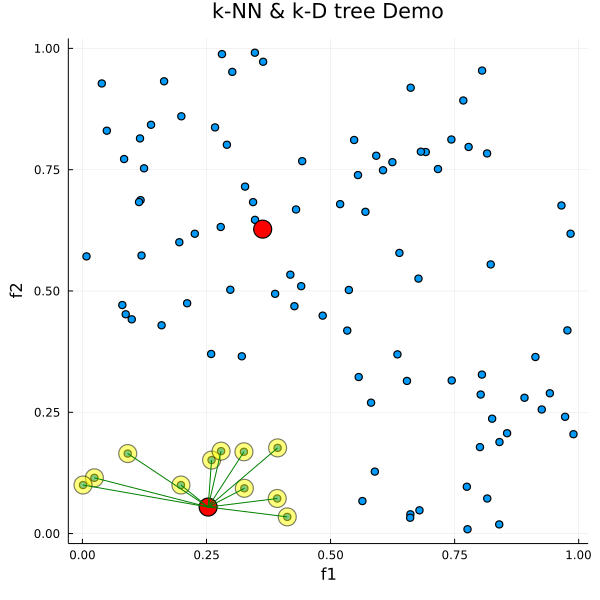

In [82]:
# Initialize k for k-NN
k = 11
# Generate Random test point
f1_test = rand()

f2_test = rand()

X_test = [f1_test, f2_test]
#test plot
scatter!([X_test[1]], [X_test[2]], label =false,
    c = :red,
    ms = 10)

Find nearest neighbors using k-NN & k-d tree

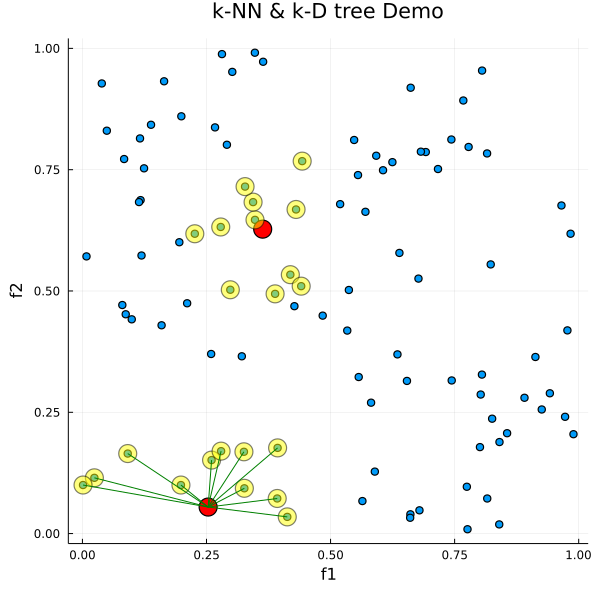

In [83]:
index_knn, distances = knn(kdtree, X_test, k, true)

# display output

output = [index_knn distances]

# plot nearest neighbors

f1_knn = [f1_train[i] for i in index_knn]

f2_knn = [f2_train[i] for i in index_knn]

scatter!(f1_knn, f2_knn,
    color = :yellow, markersize = 10, alpha = 0.5, label = false
)

Connect test point with nearest neighbors


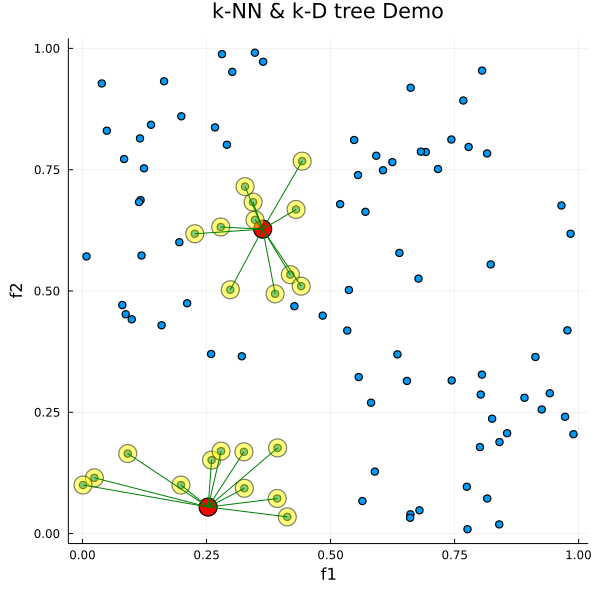

In [84]:
for i in 1:k
    plot!([f1_test, f1_knn[i]], [f2_test, f2_knn[i]], label =false,
        color = :green
    )
end

p_knn